In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#dividing into dependent and independent data
x=df.iloc[:,3:13]

In [5]:
y=df.iloc[:,13]

In [6]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
geography=pd.get_dummies(x["Geography"],drop_first=True)

In [9]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [11]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
x=x.drop(["Geography","Gender"],axis=1)

In [13]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
x=pd.concat([x,geography,gender],axis=1)

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss=StandardScaler()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
x_train=ss.fit_transform(x_train)

In [21]:
x_train

array([[ 0.05424093, -0.18305717,  0.68386483, ..., -0.58042949,
        -0.56637961, -1.09361434],
       [ 0.58201987, -0.95387489, -1.38806042, ..., -0.58042949,
         1.76560027, -1.09361434],
       [-0.13203399,  2.03304379, -0.69741867, ..., -0.58042949,
        -0.56637961,  0.91439913],
       ...,
       [-1.09445442, -1.6283404 , -0.3520978 , ..., -0.58042949,
         1.76560027,  0.91439913],
       [ 0.18877282,  0.68411277, -1.04273955, ..., -0.58042949,
        -0.56637961, -1.09361434],
       [ 0.82003782,  0.49140834, -0.3520978 , ..., -0.58042949,
         1.76560027,  0.91439913]])

In [22]:
x_t=pd.DataFrame(x_train)
x_t

,0,1,2,3,4,5,6,7,8,9,10
0,0.054241,-0.183057,0.683865,0.569408,0.802594,0.649008,-1.030464,-1.561409,-0.580429,-0.56638,-1.093614
1,0.582020,-0.953875,-1.388060,2.134707,-0.915103,0.649008,0.970437,0.568601,-0.580429,1.76560,-1.093614
2,-0.132034,2.033044,-0.697419,-1.223791,0.802594,0.649008,0.970437,-0.526168,-0.580429,-0.56638,0.914399
3,1.068404,-0.375762,-0.352098,-1.223791,0.802594,0.649008,0.970437,0.100730,-0.580429,-0.56638,0.914399
4,0.851084,0.395056,1.374507,-1.223791,0.802594,0.649008,-1.030464,1.434084,-0.580429,-0.56638,-1.093614
...,...,...,...,...,...,...,...,...,...,...,...
7995,0.975267,-1.242932,-0.006777,1.442258,-0.915103,0.649008,0.970437,1.408877,-0.580429,1.76560,-1.093614
7996,0.002498,-1.339284,-0.697419,0.164648,2.520291,0.649008,-1.030464,-1.454902,-0.580429,1.76560,-1.093614
7997,-1.094454,-1.628340,-0.352098,-1.223791,0.802594,0.649008,-1.030464,-0.529055,-0.580429,1.76560,0.914399
7998,0.188773,0.684113,-1.042740,-1.223791,2.520291,0.649008,-1.030464,-0.198669,-0.580429,-0.56638,-1.093614


In [23]:
x_test=ss.transform(x_test)

In [24]:
x_test

array([[ 1.40990841, -1.43563597, -1.04273955, ...,  1.72286214,
        -0.56637961,  0.91439913],
       [ 2.07221924, -1.33928375,  1.0291857 , ...,  1.72286214,
        -0.56637961, -1.09361434],
       [-0.74260179, -1.05022711,  1.0291857 , ..., -0.58042949,
         1.76560027, -1.09361434],
       ...,
       [-0.78399621, -1.05022711,  0.68386483, ..., -0.58042949,
         1.76560027, -1.09361434],
       [-0.03889653,  0.58776056, -0.69741867, ..., -0.58042949,
        -0.56637961, -1.09361434],
       [-0.92887671, -1.43563597, -1.38806042, ..., -0.58042949,
        -0.56637961,  0.91439913]])

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,ReLU,LeakyReLU,ELU,PReLU

In [26]:
classifier=Sequential()

In [27]:
classifier.add(Dense(units=11,activation='relu'))#Input Layer
classifier.add(Dense(units=7,activation='relu'))#1st hidden layer
classifier.add(Dense(units=3,activation='relu'))#2nd hidden layer
classifier.add(Dense(1,activation='sigmoid'))#output Layer

In [28]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.2,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [30]:
model=classifier.fit(x_train,y_train,validation_split=0.2,batch_size=10,epochs=50,callbacks=early_stopping)

Epoch 1/50
640/640 [==============================] - 3s 3ms/step - loss: 0.5003 - accuracy: 0.7994 - val_loss: 0.4676 - val_accuracy: 0.7850
Epoch 2/50
640/640 [==============================] - 2s 3ms/step - loss: 0.4297 - accuracy: 0.7994 - val_loss: 0.4431 - val_accuracy: 0.7850
Epoch 3/50
640/640 [==============================] - 2s 2ms/step - loss: 0.4156 - accuracy: 0.7994 - val_loss: 0.4309 - val_accuracy: 0.7850
Epoch 4/50
640/640 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8242 - val_loss: 0.4247 - val_accuracy: 0.8244
Epoch 5/50
640/640 [==============================] - 1s 2ms/step - loss: 0.4020 - accuracy: 0.8281 - val_loss: 0.4234 - val_accuracy: 0.8200
Epoch 6/50
640/640 [==============================] - 2s 2ms/step - loss: 0.3962 - accuracy: 0.8306 - val_loss: 0.4152 - val_accuracy: 0.8206
Epoch 7/50
640/640 [==============================] - 2s 3ms/step - loss: 0.3905 - accuracy: 0.8328 - val_loss: 0.4043 - val_accuracy: 0.8294
Epoch 

In [31]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

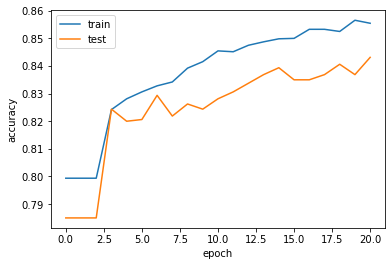

In [32]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')

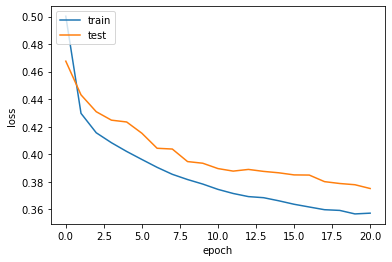

In [33]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')

In [34]:
y_pred=classifier.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [35]:
y_pred=(y_pred>=0.5)

In [37]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm=confusion_matrix(y_test,y_pred)

In [40]:
cm

array([[1526,   65],
       [ 217,  192]], dtype=int64)

In [41]:
import seaborn as sns

<AxesSubplot:>

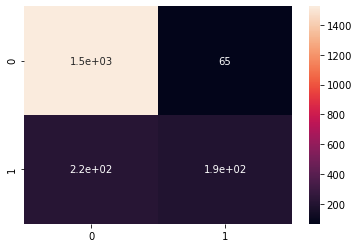

In [42]:
sns.heatmap(cm,annot=True)

In [43]:
from sklearn.metri
accuracy_score(x_test,y_test)

AttributeError: 'Sequential' object has no attribute 'score'